# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_palette("Set2")
colors = sns.color_palette("husl", 8)

In [3]:
df=pd.read_csv('titanic (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.duplicated().sum()

0

In [9]:
df.size

10692

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
#Create readable Embarked labels for plotting
df['EmbarkedLabel'] = df['Embarked'].map({0: 'S', 1: 'C', 2: 'Q'})

In [14]:
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))
# Bin Fare and Age for analysis
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])
df['AgeBand'] = pd.cut(df['Age'], 5, labels=[0, 1, 2, 3, 4])

In [15]:
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [16]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [17]:
# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [18]:
# Extract title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}).fillna(0)


# Exploratory Data Analysis (EDA)

## Survival Count

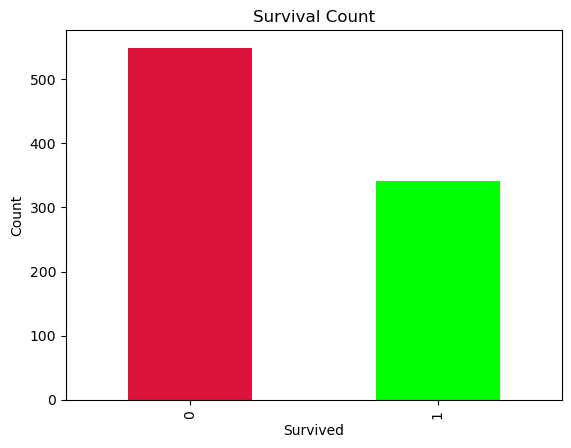

In [136]:
df['Survived'].value_counts().plot(kind='bar', color=colors[:2], title='Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

## Passenger Class 

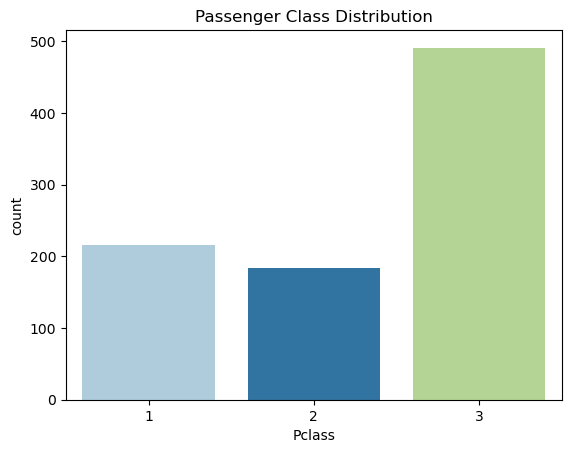

In [98]:
sns.countplot(x='Pclass', data=df, palette="Paired")
plt.title("Passenger Class Distribution")
plt.show()

## Gender Pie Chart

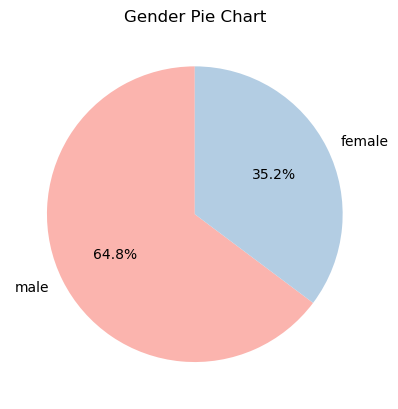

In [100]:
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Pastel1"))
plt.title("Gender Pie Chart")
plt.ylabel('')
plt.show()

## Age Distribution 

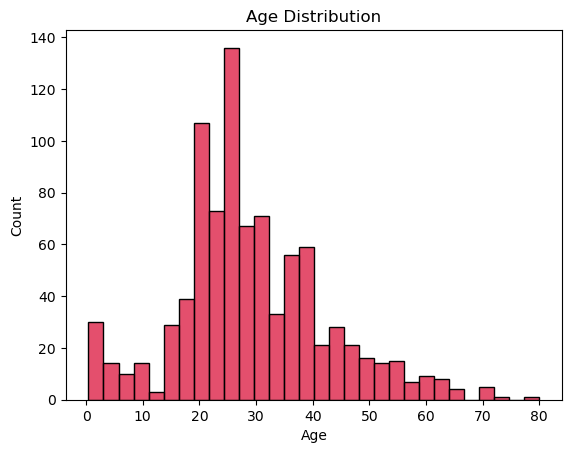

In [102]:
sns.histplot(df['Age'], bins=30, kde=False, color=colors[6])
plt.title("Age Distribution")
plt.show()


## Gender Count

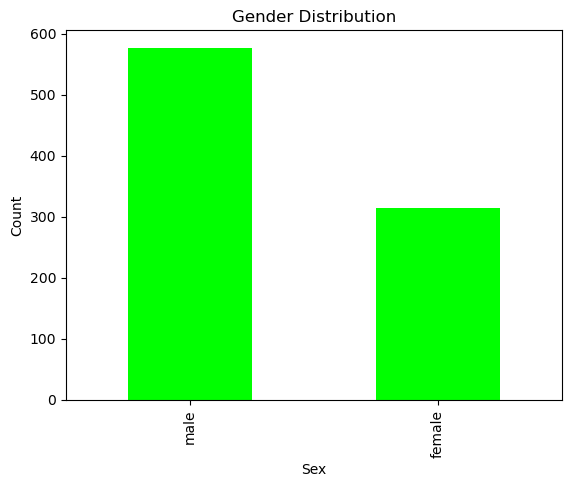

In [104]:
df['Sex'].value_counts().plot(kind='bar', title='Gender Distribution', color=colors[2:4])
plt.ylabel('Count')
plt.show()


## Fare Distribution 

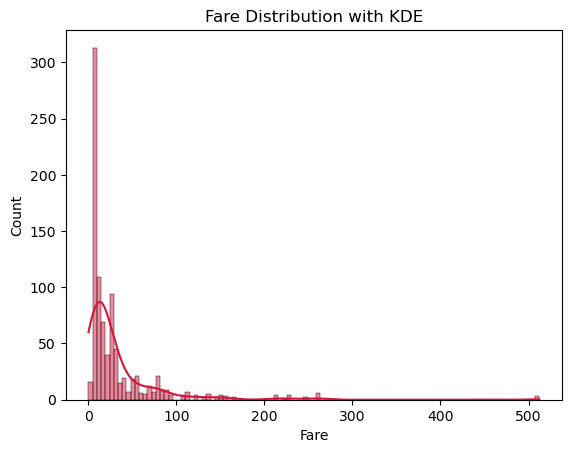

In [106]:
sns.histplot(df['Fare'], kde=True, color=colors[7])
plt.title("Fare Distribution with KDE")
plt.show()


## Embarked Port 

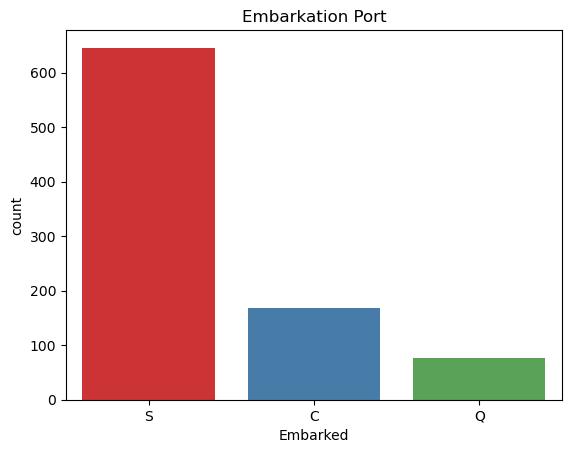

In [108]:
sns.countplot(x='Embarked', data=df, palette="Set1")
plt.title("Embarkation Port")
plt.xlabel("Embarked")
plt.show()

## Survival by Gender 

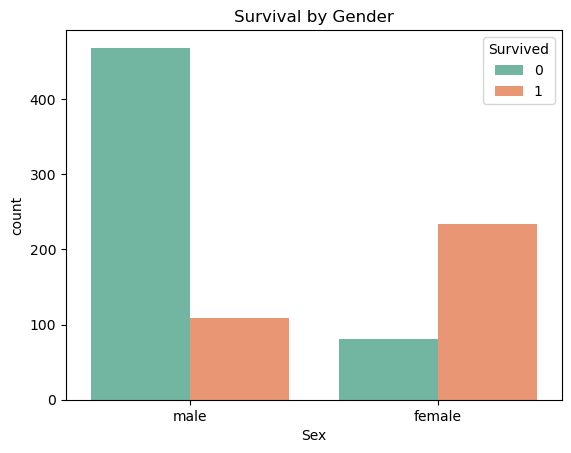

In [110]:
sns.countplot(x='Sex', hue='Survived', data=df, palette="Set2")
plt.title("Survival by Gender")
plt.show()

## Age by Class

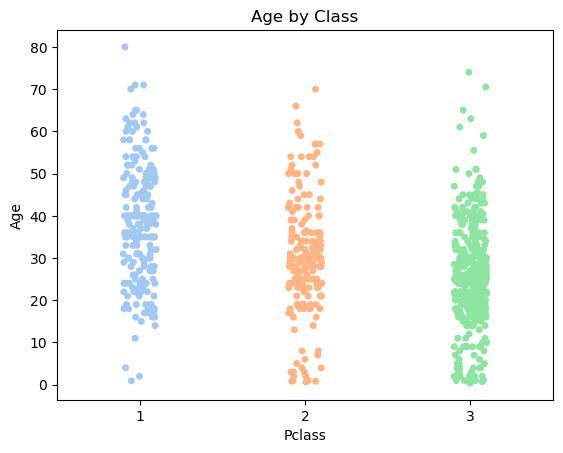

In [138]:
sns.stripplot(x='Pclass', y='Age', data=df, jitter=True, palette="pastel")
plt.title("Age by Class")
plt.show()


## Survival by Class

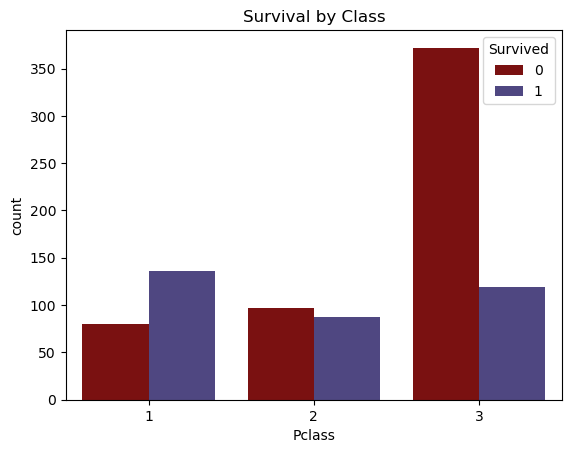

In [114]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette=["darkred", "darkslateblue"])
plt.title("Survival by Class")
plt.show()

## Fare by Class

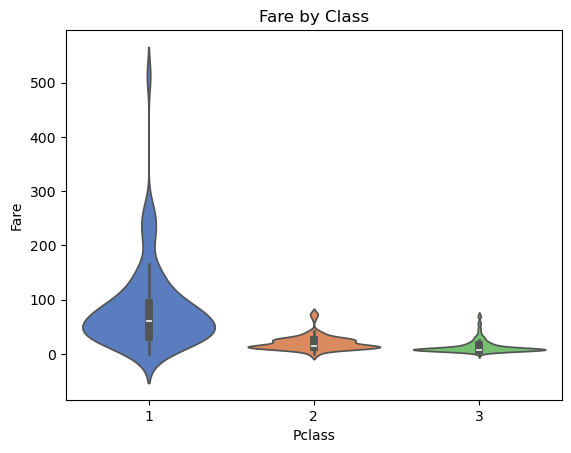

In [116]:
sns.violinplot(x='Pclass', y='Fare', data=df, palette="muted")
plt.title("Fare by Class")
plt.show()

## Survival by Embarkation 

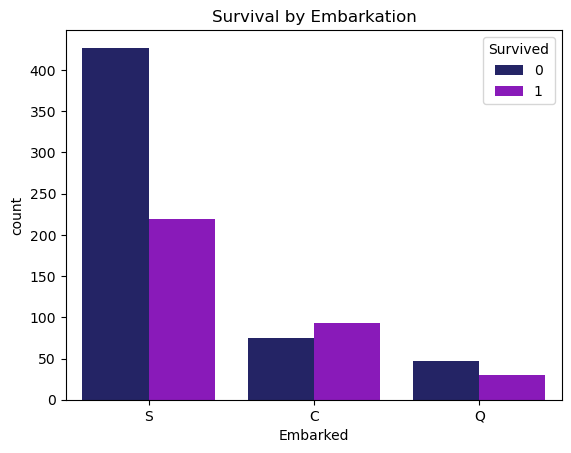

In [118]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette=["midnightblue", "darkviolet"])
plt.title("Survival by Embarkation")
plt.xlabel("Embarked")
plt.show()

## Fare by Survival

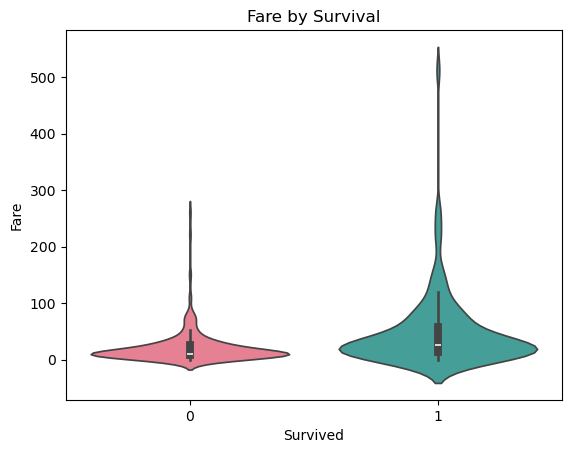

In [120]:
sns.violinplot(x='Survived', y='Fare', data=df, palette="husl")
plt.title("Fare by Survival")
plt.show()

## Age vs Fare

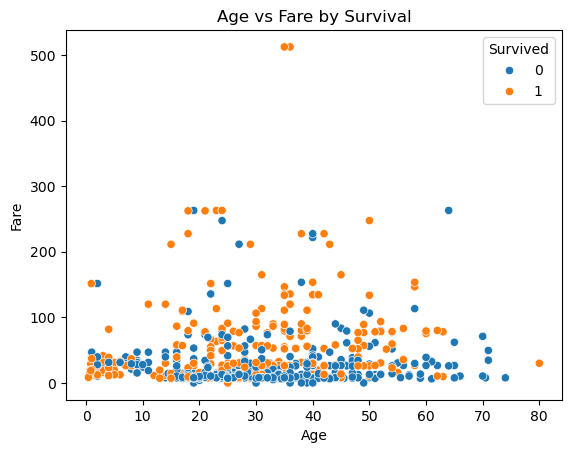

In [122]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette="tab10")
plt.title("Age vs Fare by Survival")
plt.show()

## Age by Survival

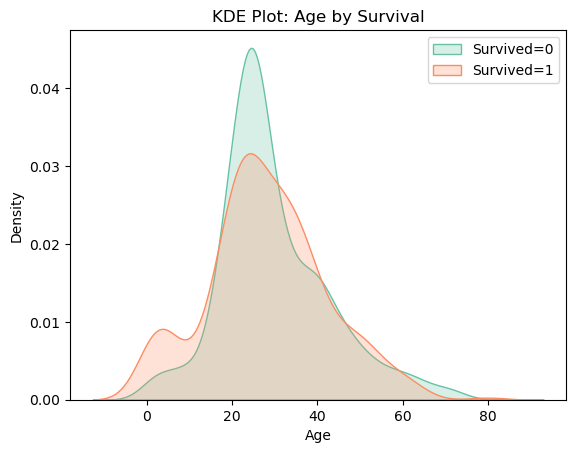

In [124]:
for label in df['Survived'].unique():
    sns.kdeplot(df[df['Survived'] == label]['Age'], label=f'Survived={label}', fill=True)
plt.title("KDE Plot: Age by Survival")
plt.legend()
plt.show()

## Family Size Count by Survival

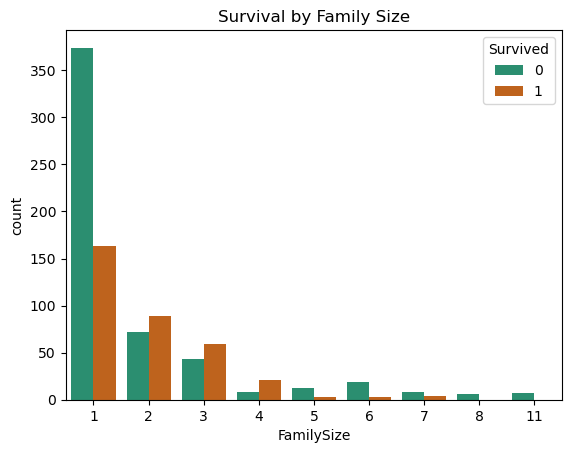

In [126]:
sns.countplot(x='FamilySize', hue='Survived', data=df, palette="Dark2")
plt.title("Survival by Family Size")
plt.show()

##  Age Group vs Class for Survivors

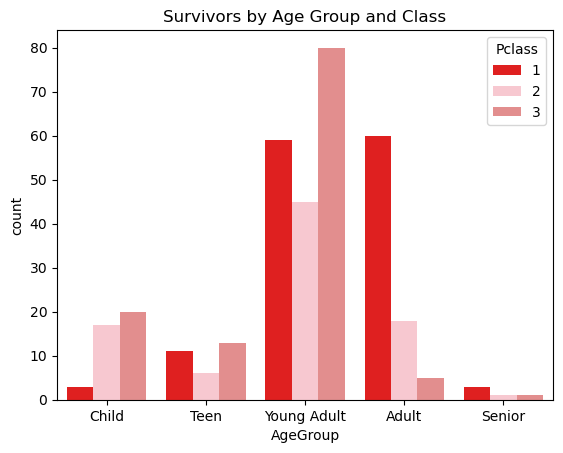

In [128]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(x='AgeGroup', hue='Pclass', data=df[df['Survived'] == 1], palette=["red", "pink", "lightcoral"])
plt.title("Survivors by Age Group and Class")
plt.show()


## Survival by Fare Band

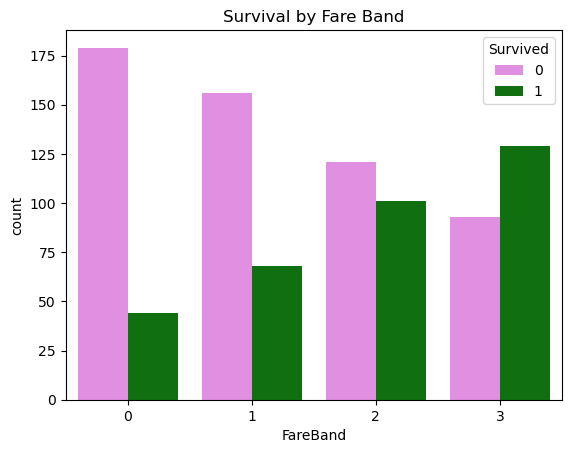

In [130]:
sns.countplot(x='FareBand', hue='Survived', data=df, palette=["violet", "green"])
plt.title("Survival by Fare Band")
plt.show()

## Correlation Heatmap

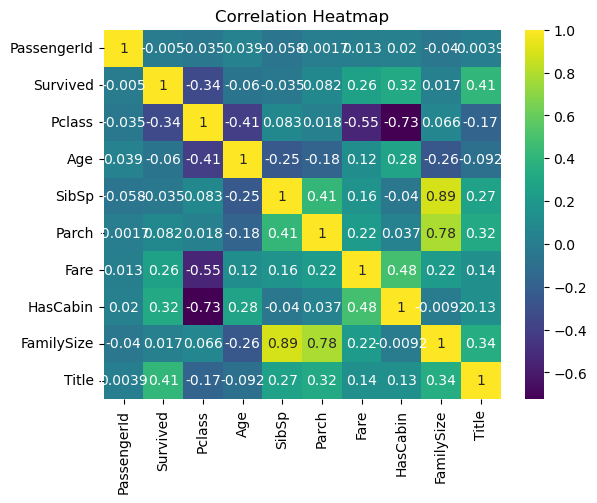

In [132]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

## 3D Scatter Plot: Age, Fare, Class 

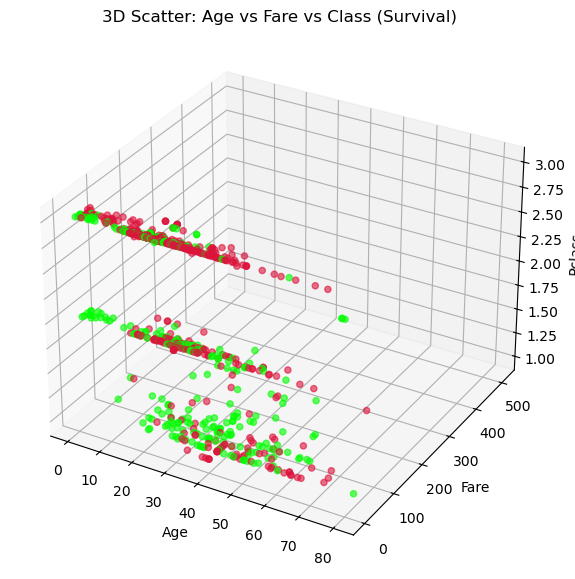

In [134]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = df['Survived'].map({0: 'crimson', 1: 'lime'})
ax.scatter(df['Age'], df['Fare'], df['Pclass'], c=colors, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Pclass')
ax.set_title('3D Scatter: Age vs Fare vs Class (Survival)')
plt.show()


# Final insights From Model Performance

• 1st class passengers had significantly higher survival rates than 2nd and 3rd class.

• Women and children were prioritized during evacuation, resulting in higher survival.

• Higher fares generally indicated better cabins and higher survival chances.

• Cherbourg (C) passengers had higher survival rates, likely due to wealth/class.

• Most non-survivors were adult males from 3rd class, often with low fare tickets.

• Survival dropped with age for older adults, especially in lower classes.

• The 3D scatter plot showed strong interaction between age, fare, and class in determining survival.

• Few elderly and low-fare passengers survived, especially in 3rd class.

• Visual trends consistently show that social class, age, gender, and fare were key survival factors.

